<a href="https://colab.research.google.com/github/SandhiyaAcharya/Online_Payment_Fraud_Detection/blob/main/Online_Payment_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
#Read Data
data=pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [123]:
#Check whether the data has null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [124]:
#Replacing the null values with 0
data.oldbalanceDest.fillna(0,inplace=True)
data.newbalanceDest.fillna(0,inplace=True)
data.isFraud.fillna(0,inplace=True)
data.isFlaggedFraud.fillna(0,inplace=True)


<Axes: ylabel='type'>

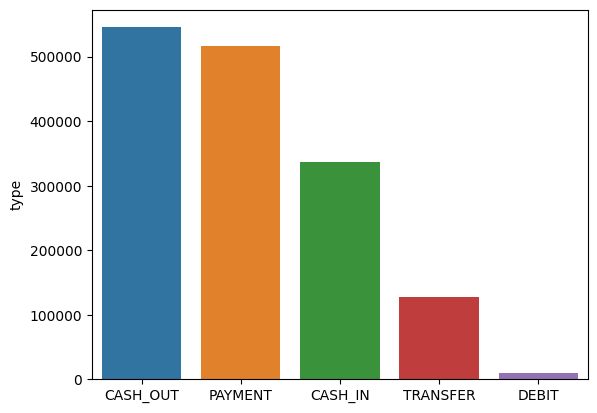

In [134]:
#Check the type of online transaction Made
data.type.value_counts()
df=pd.DataFrame(data.type.value_counts())
sns.barplot(x=df.index,y=df['type'])

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models. which only take numerical data. It is an important pre-processing step in a machine-learning project.

In [109]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['type']= label_encoder.fit_transform(data['type'])

data['type'].unique()

array([3, 4, 1, 2, 0])

In [110]:
#Replacing the 0 & 1 with Fraud and No-Fraud, for understable output
data["isFraud"].replace(to_replace = 0, value = 'Fraud', inplace=True)
data["isFraud"].replace(to_replace = 1, value = 'No-Fraud', inplace=True)
data['isFraud'].head()

0       Fraud
1       Fraud
2    No-Fraud
3    No-Fraud
4       Fraud
Name: isFraud, dtype: object

In [111]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [112]:
# training the machine learning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score,KFold

model = DecisionTreeClassifier()

# kf=KFold(n_splits=5)
# score=cross_val_score(model,x,y,cv=kf)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1, shuffle=True)
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9994728621632175


In [113]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 1000.0]])
print(model.predict(features)[0])

Fraud
